## Feature Selection using Fisher Score and Chi2 (χ2) Test | Titanic Dataset 

Watch it here: https://youtu.be/gDgEjdEzEDY

Watch Full Playlist: https://www.youtube.com/playlist?list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH

### What is Fisher Score and Chi2 (χ2) Test

Fisher score is one of the most widely used supervised feature selection methods. However, it selects each feature independently according to their scores under the Fisher criterion, which leads to a suboptimal subset of features

### Chi Square (χ2) Test

A chi-squared test, also written as χ2 test, is any statistical hypothesis test where the sampling distribution of the test statistic is a chi-squared distribution. 

chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
titanic.drop(labels = ['age', 'deck'], axis = 1, inplace = True)

In [7]:
titanic = titanic.dropna()

In [8]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [23]:
data = titanic[['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'alone']].copy()

In [24]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [25]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [26]:
sex = {'male': 0, 'female': 1}
data['sex'] = data['sex'].map(sex)

In [27]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,S,man,False
1,1,1,1,0,C,woman,False
2,3,1,0,0,S,woman,True
3,1,1,1,0,S,woman,False
4,3,0,0,0,S,man,True


In [28]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data['embarked'] = data['embarked'].map(ports)

In [29]:
who = {'man': 0, 'woman': 1, 'child': 2}
data['who'] = data['who'].map(who)

In [30]:
alone = {True: 1, False: 0}
data['alone'] = data['alone'].map(alone)

In [31]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


### Do F_Score

In [32]:
X = data.copy()
y = titanic['survived']

In [33]:
X.shape, y.shape

((889, 7), (889,))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
f_score = chi2(X_train, y_train)

In [37]:
f_score

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [38]:
p_values = pd.Series(f_score[1], index = X_train.columns)
p_values.sort_values(ascending = True, inplace = True)

In [39]:
p_values

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

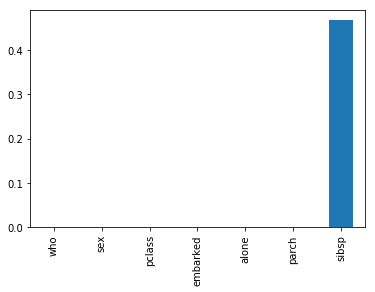

In [40]:
p_values.plot.bar()

In [41]:
X_train_2 = X_train[['who', 'sex']]
X_test_2 = X_test[['who', 'sex']]

In [42]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [43]:
%%time
run_randomForest(X_train_2, X_test_2, y_train, y_test)

Accuracy:  0.7191011235955056
Wall time: 259 ms


In [44]:
X_train_3 = X_train[['who', 'sex', 'pclass']]
X_test_3 = X_test[['who', 'sex', 'pclass']]


In [45]:
%%time
run_randomForest(X_train_3, X_test_3, y_train, y_test)

Accuracy:  0.7415730337078652
Wall time: 262 ms


In [46]:
X_train_4 = X_train[['who', 'sex', 'pclass', 'embarked']]
X_test_4 = X_test[['who', 'sex', 'pclass', 'embarked']]


In [47]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7584269662921348
Wall time: 254 ms


In [48]:
X_train_4 = X_train[['who', 'sex', 'pclass', 'alone']]
X_test_4 = X_test[['who', 'sex', 'pclass', 'alone']]


In [49]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7528089887640449
Wall time: 258 ms


In [50]:
X_train_5 = X_train[['who', 'sex', 'pclass', 'embarked', 'alone']]
X_test_5 = X_test[['who', 'sex', 'pclass', 'embarked', 'alone']]

In [51]:
%%time
run_randomForest(X_train_5, X_test_5, y_train, y_test)

Accuracy:  0.7528089887640449
Wall time: 257 ms


In [52]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.7359550561797753
Wall time: 256 ms
